In [1]:
# import libraries
import numpy as np
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df1 = pd.read_csv('data/data1/Resume/Resume.csv')
df1.drop(['ID', 'Resume_html'], axis=1, inplace=True)
df1

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [3]:
# column swapping
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

df1 = swap_columns(df1, 'Category', 'Resume_str')
df1 = df1.rename(columns={'Resume_str':'Resume'})
df1

,Category,Resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,HR DIRECTOR Summary Over 2...
3,HR,HR SPECIALIST Summary Dedica...
4,HR,HR MANAGER Skill Highlights ...
...,...,...
2479,AVIATION,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2480,AVIATION,"GOVERNMENT RELATIONS, COMMUNICATIONS ..."
2481,AVIATION,GEEK SQUAD AGENT Professional...
2482,AVIATION,PROGRAM DIRECTOR / OFFICE MANAGER ...


In [4]:
df2 = pd.read_csv('data/data2/UpdatedResumeDataSet.csv')
df2

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
# preprocessing for later classificaiton
STEMMER = nltk.stem.porter.PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('http\S+\s*', ' ', text)  
    text = re.sub('RT|cc', ' ', text)  
    text = re.sub('#\S+', '', text)  
    text = re.sub('@\S+', '  ', text)  
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text = nltk.tokenize.word_tokenize(text)
    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]
    #text = [STEMMER.stem(w) for w in text]
    
    return ' '.join(text)

In [6]:
df1['Resume'] = df1['Resume'].apply(lambda w: preprocess(w))
df2['Resume'] = df2['Resume'].apply(lambda w: preprocess(w))

In [7]:
df1

,Category,Resume
0,HR,hr administrator marketing associate hr admini...
1,HR,hr specialist us hr operations summary versati...
2,HR,hr director summary years experience recruitin...
3,HR,hr specialist summary dedicated driven dynamic...
4,HR,hr manager skill highlights hr skills hr depar...
...,...,...
2479,AVIATION,rank sgt e non commissioned officer charge bri...
2480,AVIATION,government relations communications organizati...
2481,AVIATION,geek squad agent professional profile support ...
2482,AVIATION,program director office manager summary highly...


In [8]:
df2

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may may b e uit rgpv data sc...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient ms office word basi...
958,Testing,willingness ept challenges positive thinking g...
959,Testing,personal skills quick learner eagerness learn ...
960,Testing,computer skills software knowledge ms power po...


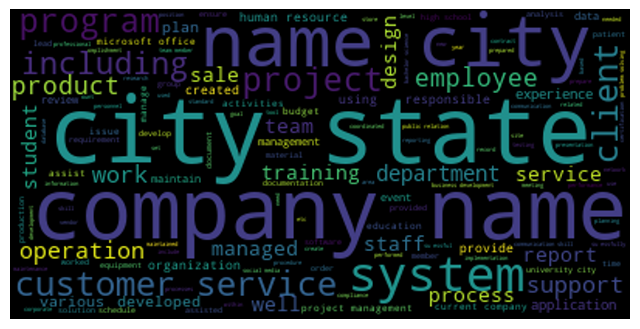

In [9]:
txt = ' '.join(txt for txt in df1['Resume'])
wc = WordCloud().generate(txt)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='spline16')
plt.axis("off")
plt.show()

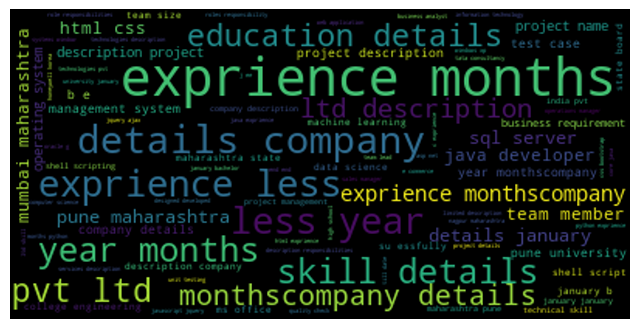

In [10]:
txt = ' '.join(txt for txt in df2['Resume'])
wc = WordCloud().generate(txt)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='spline16')
plt.axis("off")
plt.show()

In [11]:
category1 = df1['Category'].value_counts().reset_index()
category1

,index,Category
0,INFORMATION-TECHNOLOGY,120
1,BUSINESS-DEVELOPMENT,120
2,FINANCE,118
3,ADVOCATE,118
4,ACCOUNTANT,118
5,ENGINEERING,118
6,CHEF,118
7,AVIATION,117
8,FITNESS,117
9,SALES,116


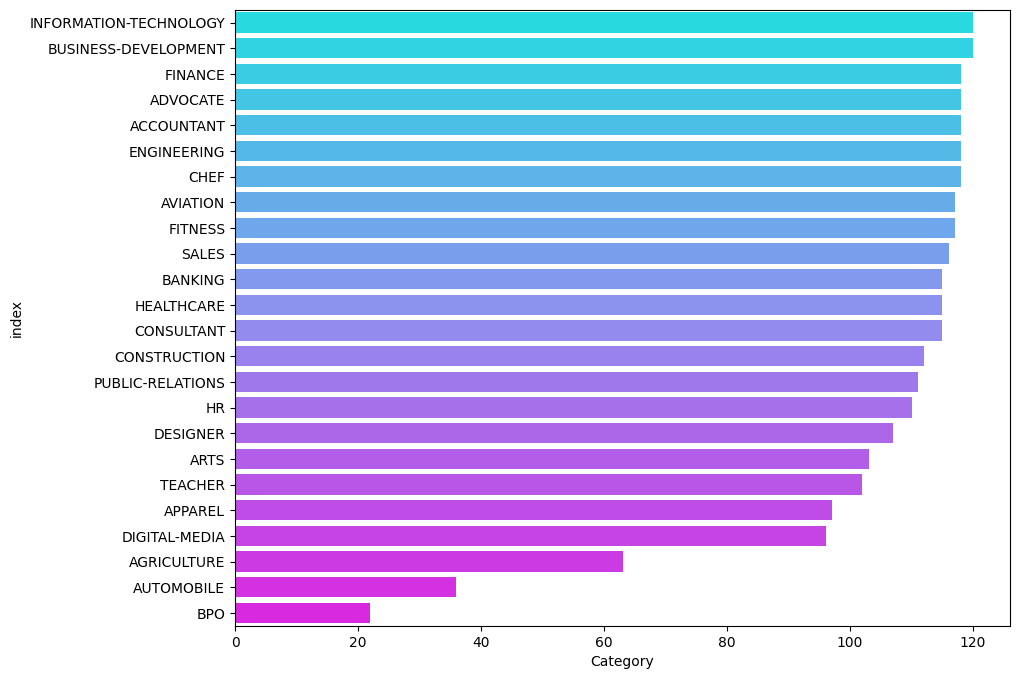

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=category1['Category'], y=category1['index'], palette='cool')
plt.show()

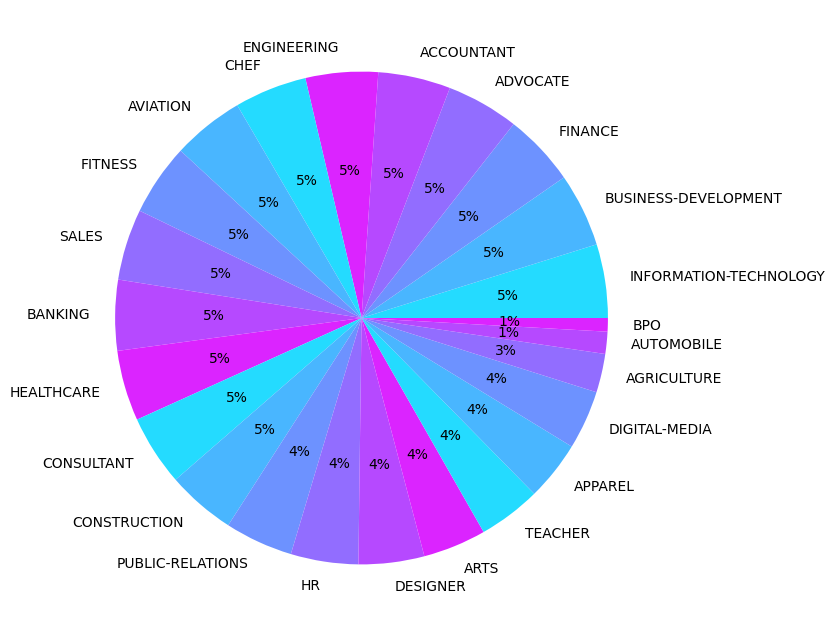

In [13]:
plt.figure(figsize=(10,8))
plt.pie(category1['Category'], labels=category1['index'],
        colors=sns.color_palette("cool"), autopct='%.0f%%')
plt.show()

In [14]:
category2 = df2['Category'].value_counts().reset_index()
category2

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


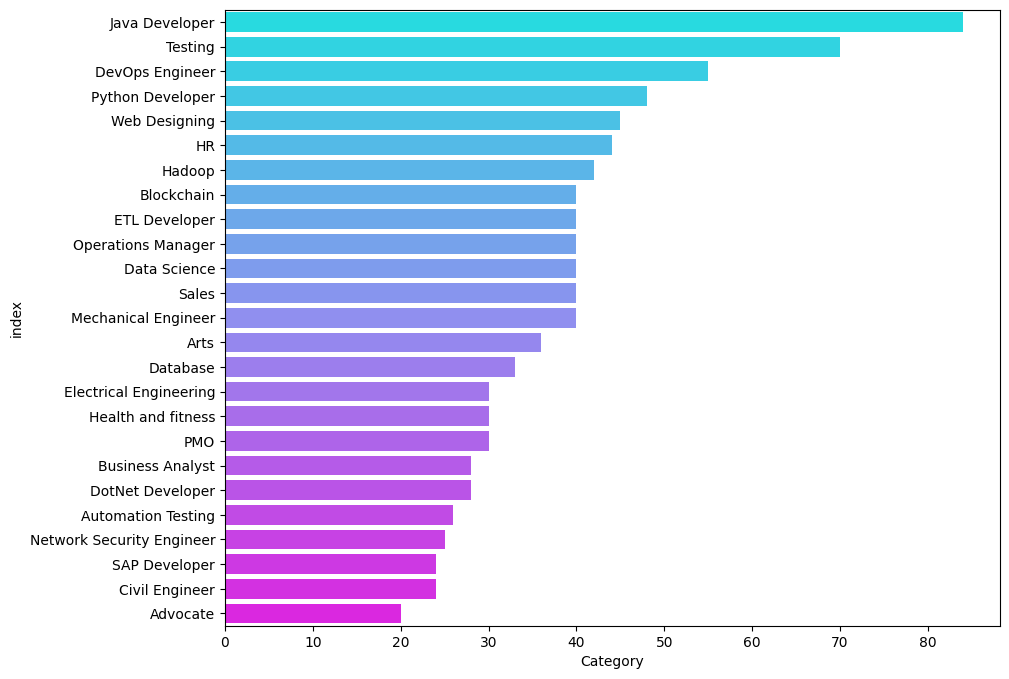

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=category2['Category'], y=category2['index'], palette='cool')
plt.show()

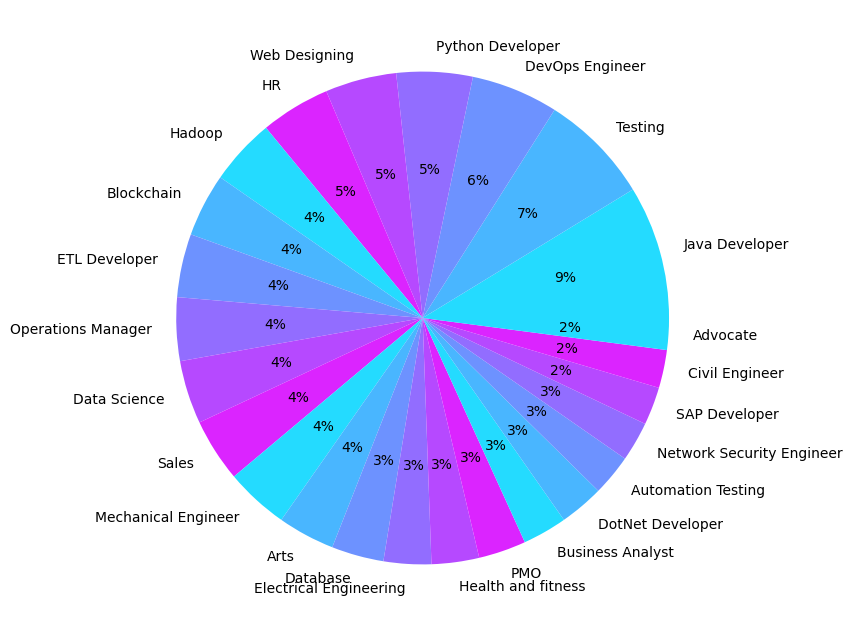

In [16]:
plt.figure(figsize=(10,8))
plt.pie(category2['Category'], labels=category2['index'],
        colors=sns.color_palette("cool"), autopct='%.0f%%')
plt.show()

In [17]:
categories1 = np.sort(df1['Category'].unique())
categories2 = np.sort(df2['Category'].unique())
df1_categories = [df1[df1['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories1]
df2_categories = [df2[df2['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories2]

In [18]:
# count word frequency
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

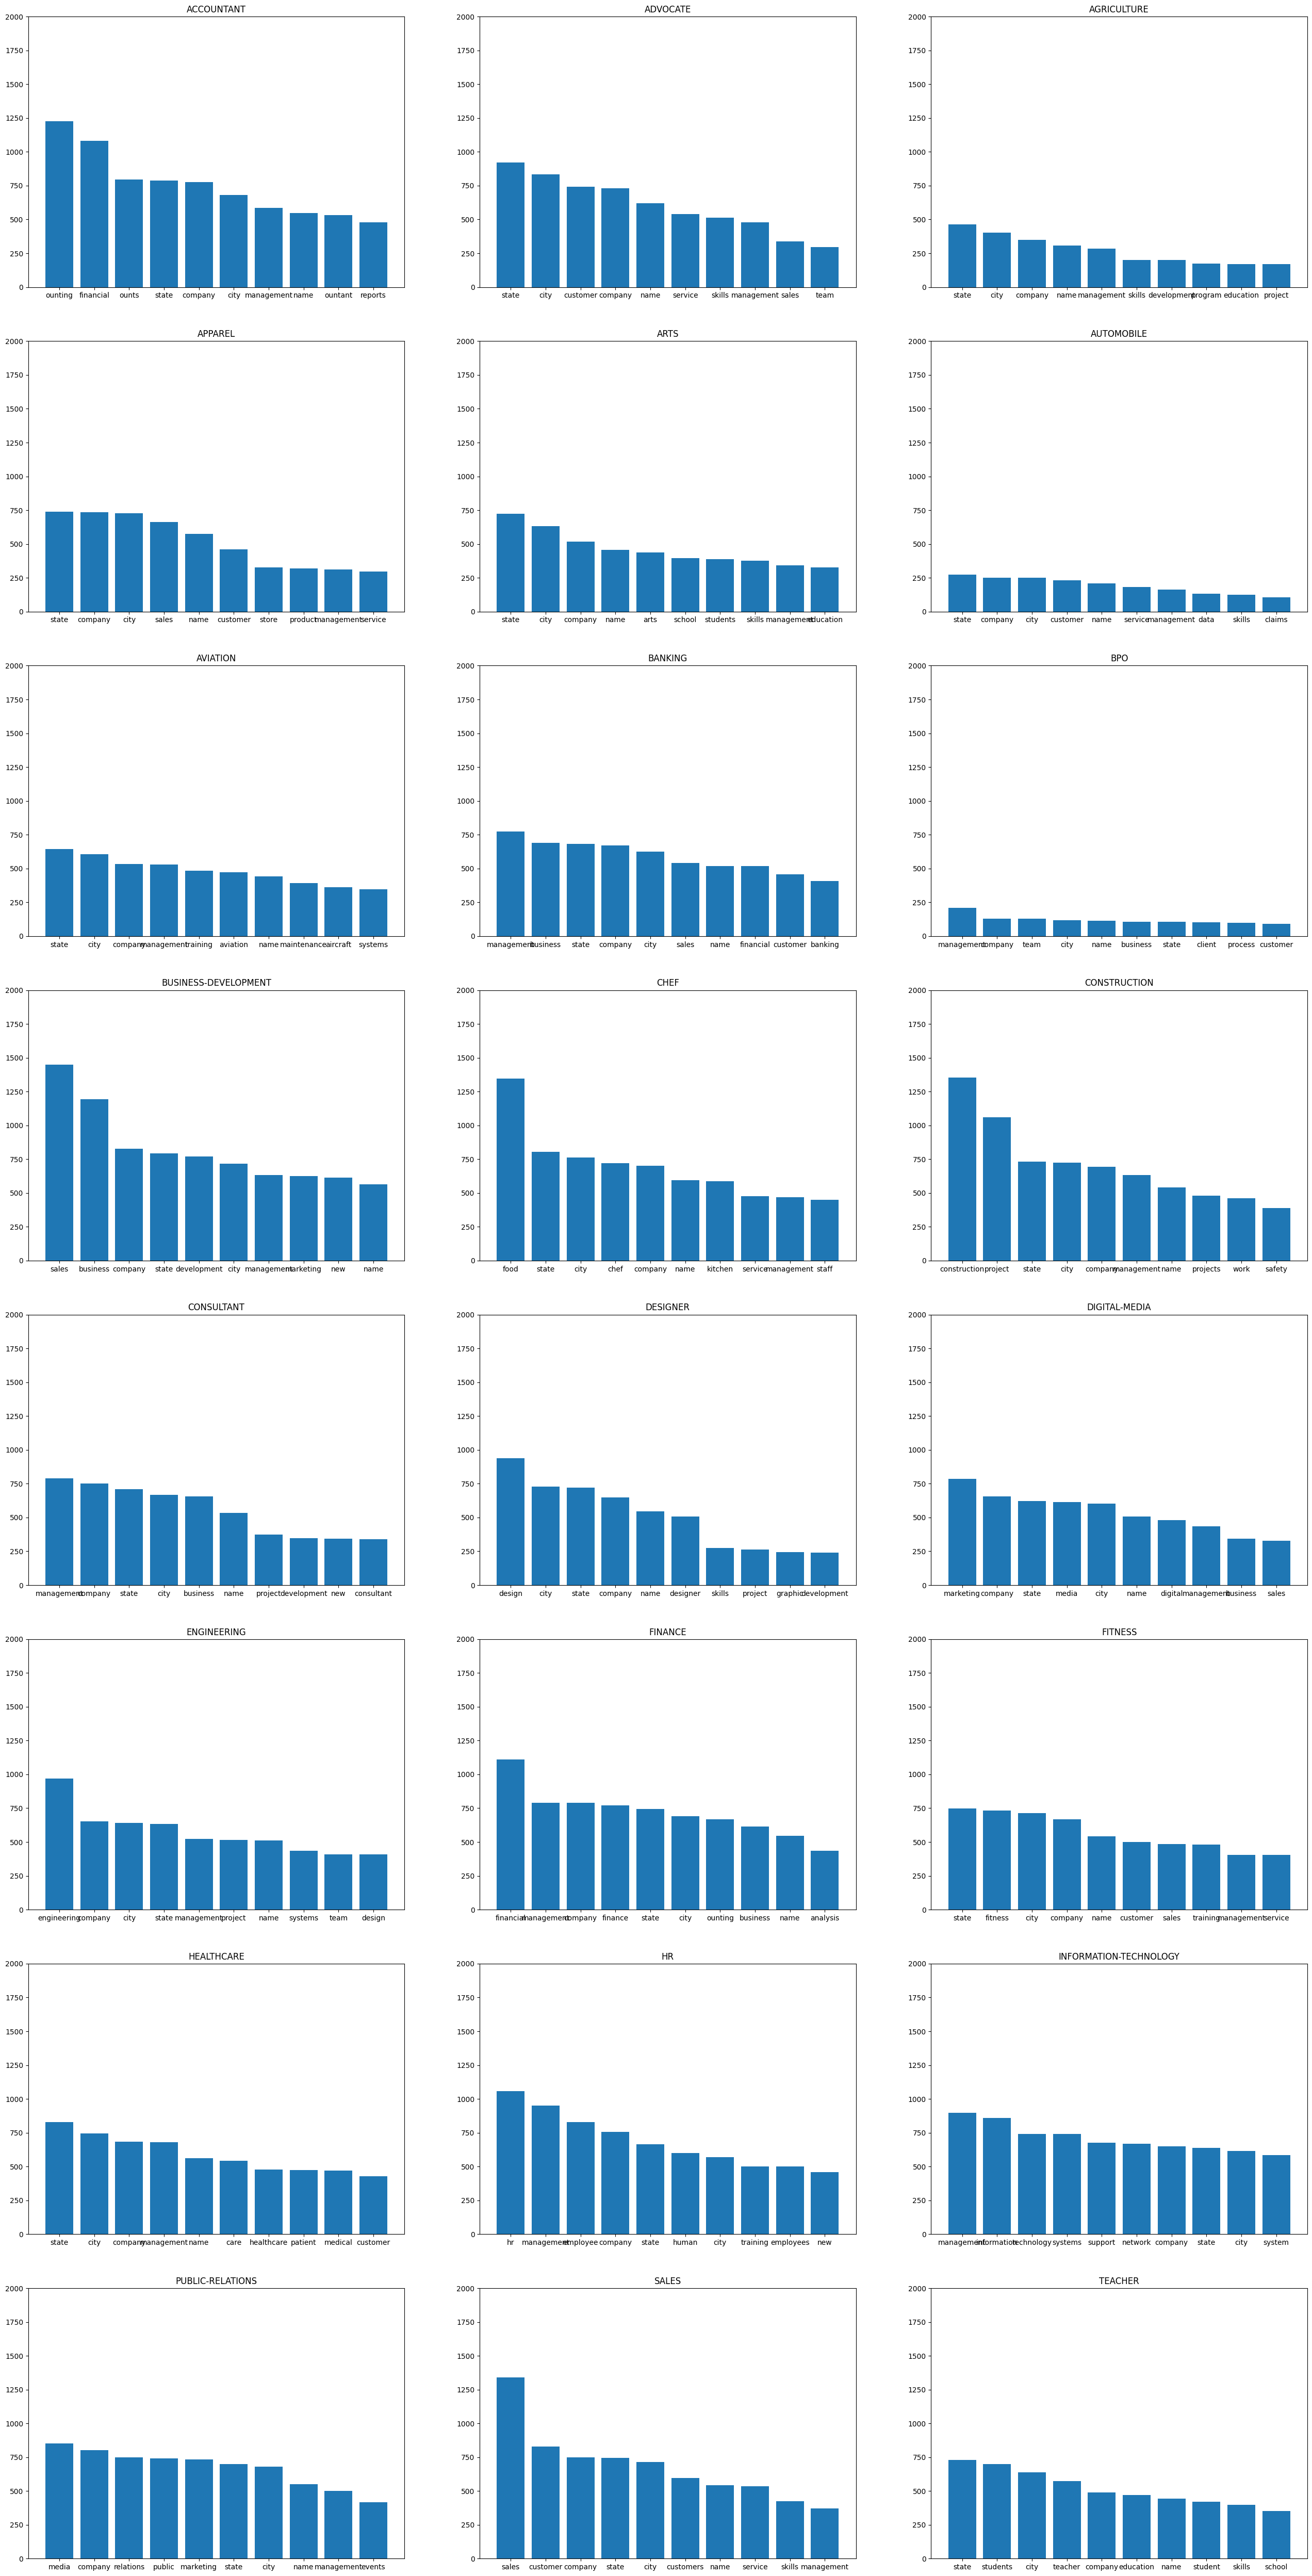

In [19]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories1):
    wf = wordfreq(df1_categories[i])

    fig.add_subplot(8, 3, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 2000)

plt.show()
plt.close()

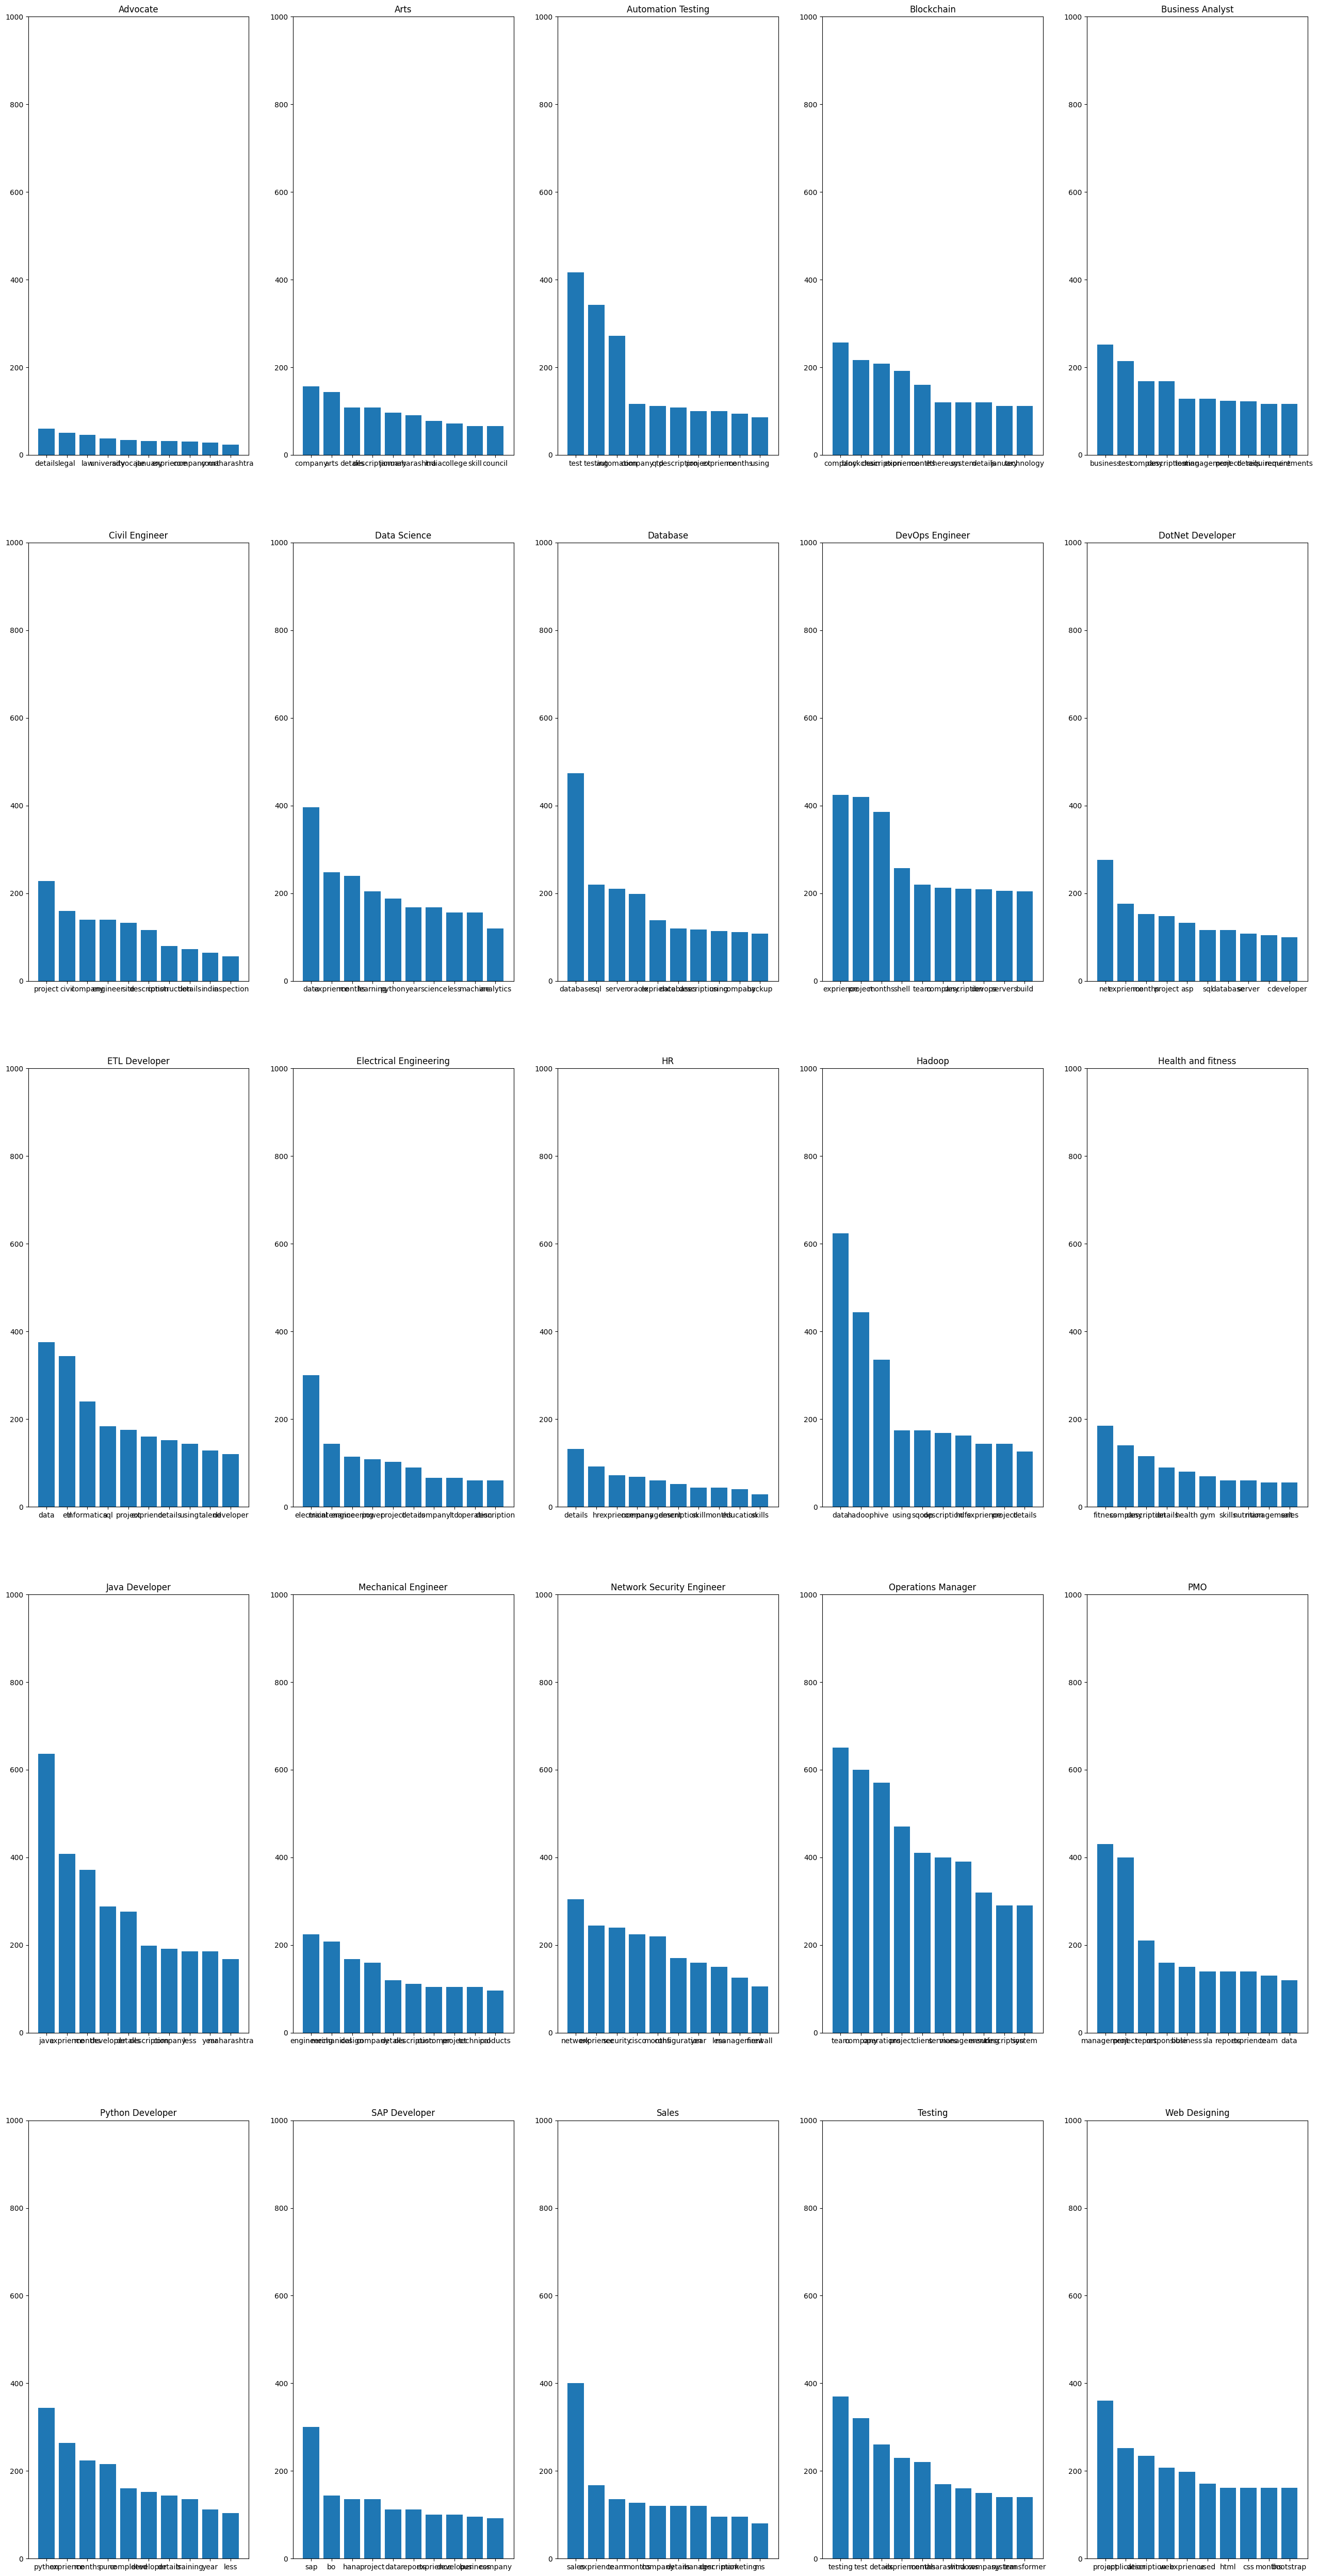

In [20]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories2):
    wf = wordfreq(df2_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 1000)

plt.show()
plt.close()

In [21]:
# Encode the target into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['new_Category'] = encoder.fit_transform(df1['Category'])

In [22]:
df1_category = encoder.classes_

# Category Classification

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(df1['Resume'], df1['new_Category'], 
                                                    test_size = 0.2, 
                                                    random_state=0,
                                                    stratify=df1['new_Category'])
Testing_data = df2['Resume']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
countvectorizer_train = word_vectorizer.fit_transform(X_train)
countvectorizer_test = word_vectorizer.transform(X_test)

countvectorizer_test2 = word_vectorizer.fit_transform(Testing_data)

### KNN

In [25]:
KNN = OneVsRestClassifier(KNeighborsClassifier(weights='distance'))
KNN.fit(countvectorizer_train, t_train)
y_train = KNN.predict(countvectorizer_train)
y_test = KNN.predict(countvectorizer_test)
print('Train accuracy = ', KNN.score(countvectorizer_train, t_train))
print(classification_report(t_train, y_train))
print('--------------------------------------------------------------------')
print('Test accuracy = ', KNN.score(countvectorizer_test, t_test))
print(classification_report(t_test, y_test))

Train accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        78
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        92
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        94
          11       1.00      1.00      1.00        90
          12       1.00      1.00      1.00        92
          13       1.00      1.00      1.00        86
          14       1.00      1.00      1.00        77
          15       1.00      1.00      1.00        94
          16       1.00      1.00      1.00        94
     

C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [54]:
param = {'C':[0.1,0.3,0.5,0.7,0.9],
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'degree':[3,4,5,6]}

In [65]:
from sklearn.svm import SVC
SVM = OneVsRestClassifier(SVC(C=0.9, degree=3, kernel='linear'))
# 70% (C=0.9, degree=3, kernel='linear')
# 69% (C=0.9, degree=3, kernel='sigmoid')
SVM.fit(countvectorizer_train, t_train)
y_train = SVM.predict(countvectorizer_train)
y_test = SVM.predict(countvectorizer_test)
print('Train accuracy = ', SVM.score(countvectorizer_train, t_train))
print(classification_report(t_train, y_train))
print('--------------------------------------------------------------------')
print('Test accuracy = ', SVM.score(countvectorizer_test, t_test))
print(classification_report(t_test, y_test))

Train accuracy =  0.9929542023150478
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        78
           4       1.00      0.96      0.98        82
           5       1.00      1.00      1.00        29
           6       0.98      0.99      0.98        93
           7       1.00      1.00      1.00        92
           8       1.00      1.00      1.00        18
           9       0.99      0.98      0.98        96
          10       0.99      1.00      0.99        94
          11       0.99      1.00      0.99        90
          12       1.00      1.00      1.00        92
          13       1.00      1.00      1.00        86
          14       1.00      0.99      0.99        77
          15       1.00      0.98      0.99        94
          16       1.00      0.98      0.99 

C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
param = {'n_estimators':[300,400,500,600],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[3,5,7,9,11,13],
        'min_samples_leaf':[10,15,20]}

gridsearch = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param,
                         cv = 5,
                         scoring='accuracy',
                         refit=True)
RF = gridsearch.fit(countvectorizer_train, t_train)
print(RF.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 10, 'n_estimators': 400}


In [29]:
y_train = RF.predict(countvectorizer_train)
y_test = RF.predict(countvectorizer_test)
print('Train accuracy = ', RF.score(countvectorizer_train, t_train))
print(classification_report(t_train, y_train))
print('--------------------------------------------------------------------')
print('Test accuracy = ', RF.score(countvectorizer_test, t_test))
print(classification_report(t_test, y_test))

Train accuracy =  0.7418218419728233
              precision    recall  f1-score   support

           0       0.63      0.96      0.76        94
           1       0.83      0.64      0.72        94
           2       0.92      0.22      0.35        50
           3       0.98      0.54      0.69        78
           4       1.00      0.11      0.20        82
           5       0.00      0.00      0.00        29
           6       0.83      0.90      0.87        93
           7       0.79      0.86      0.82        92
           8       0.00      0.00      0.00        18
           9       0.72      0.81      0.76        96
          10       0.74      0.91      0.82        94
          11       0.81      0.97      0.88        90
          12       1.00      0.34      0.50        92
          13       0.84      0.94      0.89        86
          14       0.90      0.71      0.80        77
          15       0.72      0.90      0.80        94
          16       0.85      0.66      0.74 

C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda new\anaconda\env

### Deep Learning: TensorFlow

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
from sklearn.utils import shuffle

sentences = df1['Resume'].tolist()
labels = df1['Category'].tolist()

for i in range(len(df1)):
    labels[i] = str(labels[i].lower())
    labels[i] = labels[i].replace("-", "")
    
sentences, labels = shuffle(sentences, labels)

In [32]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [33]:
vocab_size = 6000
oov = '<OOV>'
embedding_dim = 64
max_length = 300
padding_type = 'post'
truncating_type = 'post'


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov)
tokenizer.fit_on_texts(sentences)

training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_pad = pad_sequences(training_sequence, maxlen=max_length, padding=padding_type, truncating=truncating_type)


testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_pad = pad_sequences(testing_sequence, maxlen=max_length, padding=padding_type, truncating=truncating_type)
#-----------------------------------------------------------------------------------
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label = label_tokenizer.texts_to_sequences(training_labels)
training_label = np.array(training_label)

testing_label = label_tokenizer.texts_to_sequences(testing_labels)
testing_label = np.array(testing_label)

### LSTM

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           384000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
Total params: 459,929
Trainable params: 459,929
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
num_epochs = 20

history = model.fit(training_pad, training_label, 
                    epochs=num_epochs, 
                    validation_data=(testing_pad, testing_label))

Epoch 1/20
63/63 [==============================] - 11s 57ms/step - loss: 3.1539 - accuracy: 0.0981 - val_loss: 3.0418 - val_accuracy: 0.1610
Epoch 2/20
63/63 [==============================] - 3s 40ms/step - loss: 2.6393 - accuracy: 0.3689 - val_loss: 2.1864 - val_accuracy: 0.4789
Epoch 3/20
63/63 [==============================] - 3s 41ms/step - loss: 1.5334 - accuracy: 0.6291 - val_loss: 1.4383 - val_accuracy: 0.6378
Epoch 4/20
63/63 [==============================] - 3s 40ms/step - loss: 0.8927 - accuracy: 0.7796 - val_loss: 1.2774 - val_accuracy: 0.6841
Epoch 5/20
63/63 [==============================] - 2s 39ms/step - loss: 0.5567 - accuracy: 0.8551 - val_loss: 1.4995 - val_accuracy: 0.6378
Epoch 6/20
63/63 [==============================] - 3s 40ms/step - loss: 0.3308 - accuracy: 0.9210 - val_loss: 1.4801 - val_accuracy: 0.6660
Epoch 7/20
63/63 [==============================] - 2s 39ms/step - loss: 0.2165 - accuracy: 0.9562 - val_loss: 1.6503 - val_accuracy: 0.6439
Epoch 8/20
6

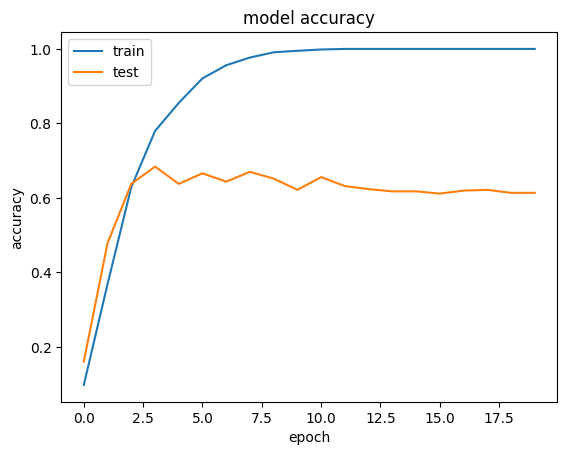

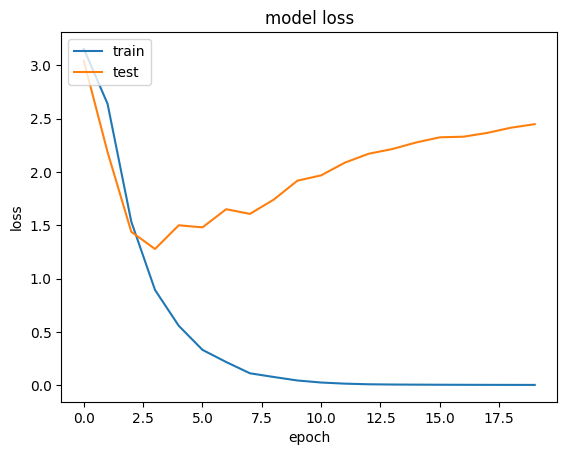

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
#---------------------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### GRU

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(embedding_dim)),
    #tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           384000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49920     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
Total params: 437,145
Trainable params: 437,145
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [40]:
num_epochs = 20

history = model.fit(training_pad, training_label, 
                    epochs=num_epochs, 
                    validation_data=(testing_pad, testing_label))

Epoch 1/20
63/63 [==============================] - 8s 57ms/step - loss: 3.1283 - accuracy: 0.2622 - val_loss: 2.9339 - val_accuracy: 0.4326
Epoch 2/20
63/63 [==============================] - 2s 39ms/step - loss: 2.3966 - accuracy: 0.5128 - val_loss: 1.8760 - val_accuracy: 0.6117
Epoch 3/20
63/63 [==============================] - 2s 39ms/step - loss: 1.4417 - accuracy: 0.6925 - val_loss: 1.4047 - val_accuracy: 0.6539
Epoch 4/20
63/63 [==============================] - 2s 39ms/step - loss: 0.9352 - accuracy: 0.7866 - val_loss: 1.3266 - val_accuracy: 0.6740
Epoch 5/20
63/63 [==============================] - 2s 40ms/step - loss: 0.6184 - accuracy: 0.8586 - val_loss: 1.3232 - val_accuracy: 0.6801
Epoch 6/20
63/63 [==============================] - 2s 39ms/step - loss: 0.3959 - accuracy: 0.9119 - val_loss: 1.3867 - val_accuracy: 0.6761
Epoch 7/20
63/63 [==============================] - 2s 38ms/step - loss: 0.3140 - accuracy: 0.9482 - val_loss: 1.4178 - val_accuracy: 0.6901
Epoch 8/20
63

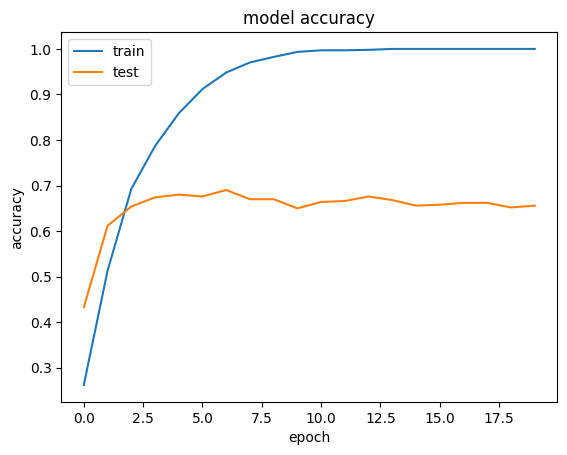

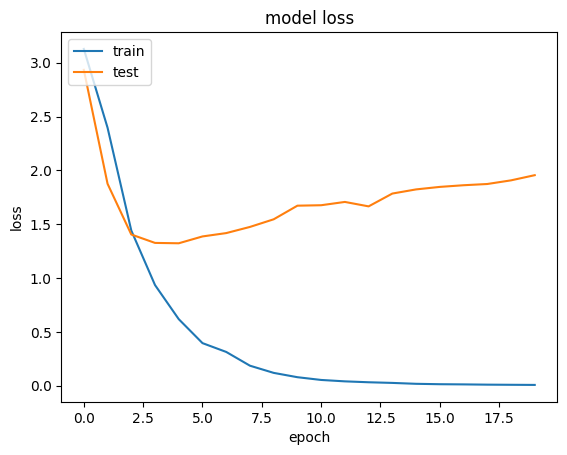

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
#---------------------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### RNN

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(embedding_dim)),
    #tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           384000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              16512     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 25)                3225      
                                                                 
Total params: 403,737
Trainable params: 403,737
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [44]:
num_epochs = 20

history = model.fit(training_pad, training_label, 
                    epochs=num_epochs, 
                    validation_data=(testing_pad, testing_label))

Epoch 1/20
63/63 [==============================] - 44s 661ms/step - loss: 3.1582 - accuracy: 0.0780 - val_loss: 3.0524 - val_accuracy: 0.1610
Epoch 2/20
63/63 [==============================] - 42s 665ms/step - loss: 2.7188 - accuracy: 0.5083 - val_loss: 2.8605 - val_accuracy: 0.2998
Epoch 3/20
63/63 [==============================] - 42s 662ms/step - loss: 2.0444 - accuracy: 0.7544 - val_loss: 2.4838 - val_accuracy: 0.3883
Epoch 4/20
63/63 [==============================] - 43s 687ms/step - loss: 1.2123 - accuracy: 0.9109 - val_loss: 2.2267 - val_accuracy: 0.4346
Epoch 5/20
63/63 [==============================] - 42s 670ms/step - loss: 0.5693 - accuracy: 0.9758 - val_loss: 2.1240 - val_accuracy: 0.4628
Epoch 6/20
63/63 [==============================] - 43s 687ms/step - loss: 0.2484 - accuracy: 0.9930 - val_loss: 2.0980 - val_accuracy: 0.4547
Epoch 7/20
63/63 [==============================] - 44s 702ms/step - loss: 0.1111 - accuracy: 0.9990 - val_loss: 2.1061 - val_accuracy: 0.4668

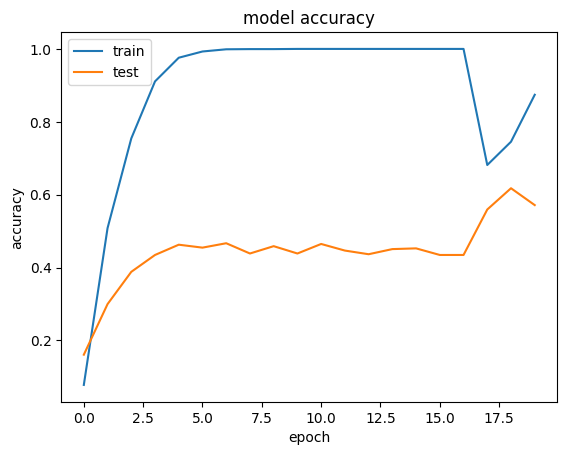

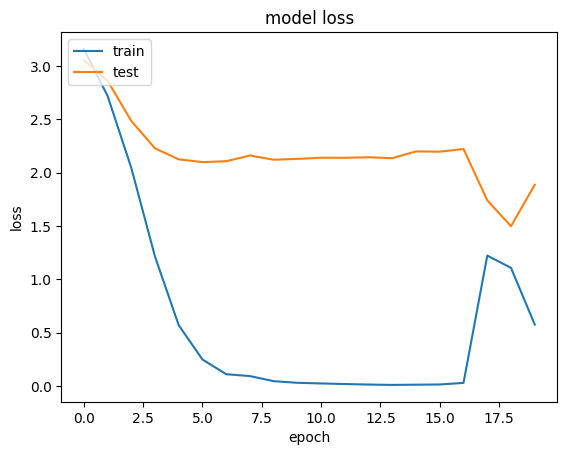

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
#---------------------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### CNN

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(25, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 64)           384000    
                                                                 
 conv1d (Conv1D)             (None, 298, 128)          24704     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 25)                3225      
                                                                 
Total params: 411,929
Trainable params: 411,929
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
num_epochs = 40

history = model.fit(training_pad, training_label, 
                    epochs=num_epochs, 
                    validation_data=(testing_pad, testing_label))

Epoch 1/40
63/63 [==============================] - 5s 14ms/step - loss: 3.1882 - accuracy: 0.0700 - val_loss: 3.1253 - val_accuracy: 0.1449
Epoch 2/40
63/63 [==============================] - 0s 7ms/step - loss: 2.9583 - accuracy: 0.2446 - val_loss: 2.7601 - val_accuracy: 0.3783
Epoch 3/40
63/63 [==============================] - 0s 7ms/step - loss: 2.4537 - accuracy: 0.4102 - val_loss: 2.3269 - val_accuracy: 0.3883
Epoch 4/40
63/63 [==============================] - 0s 6ms/step - loss: 1.9902 - accuracy: 0.4826 - val_loss: 2.0800 - val_accuracy: 0.4185
Epoch 5/40
63/63 [==============================] - 0s 6ms/step - loss: 1.6986 - accuracy: 0.5435 - val_loss: 1.9424 - val_accuracy: 0.4386
Epoch 6/40
63/63 [==============================] - 0s 6ms/step - loss: 1.4744 - accuracy: 0.5969 - val_loss: 1.8551 - val_accuracy: 0.4668
Epoch 7/40
63/63 [==============================] - 0s 7ms/step - loss: 1.3046 - accuracy: 0.6502 - val_loss: 1.7860 - val_accuracy: 0.4648
Epoch 8/40
63/63 [=

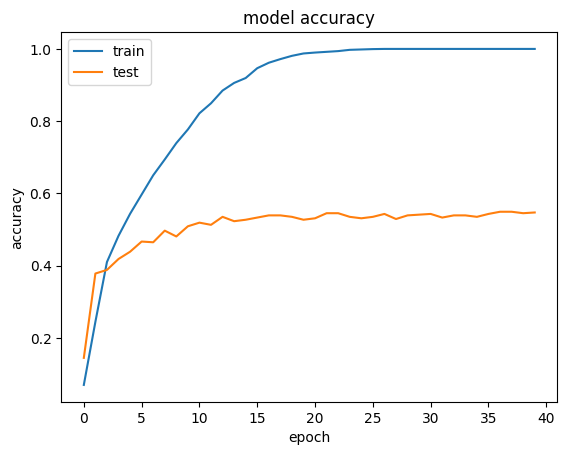

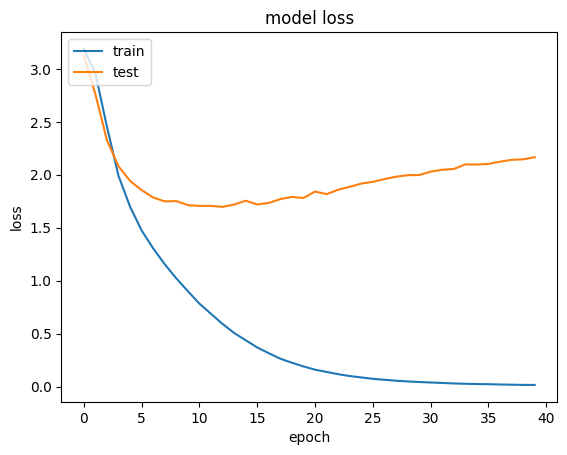

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
#---------------------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()